# Setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [4]:
# Get working dir
!pwd

/Users/aarontrefler_temp2/Documents/My_Documents/DataScience_Competitions/datadriven-nepal-earthquake/prototype/at/notebooks


In [14]:
df_X = pd.read_csv("../../../data/raw/train_values.csv")
df_y = pd.read_csv("../../../data/raw/train_labels.csv")
df_raw = df_X.merge(df_y, on='building_id')
df_raw_test = pd.read_csv("../../../data/raw/test_values.csv")

In [16]:
# Script variables
dir_root= '/Users/aarontrefler_temp2/Documents/My_Documents/DataScience_Competitions/datadriven-nepal-earthquake/prototype/at/'
dir_data = dir_root + 'data/'
dir_data_interim = dir_data + 'interim/'
dif_data_clean = dir_data + 'clean/'

# EDA

In [18]:
print("Train shape: {}".format(df_raw.shape))
print("Test shape:  {}".format(df_raw_test.shape))

display(df_X.head(10).T)
#df_raw.info()
#df_raw.describe()

Train shape: (260601, 40)
Test shape:  (86868, 39)


,0,1,2,3,4,5,6,7,8,9
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500
geo_level_1_id,6,8,21,22,11,8,9,20,0,26
geo_level_2_id,487,900,363,418,131,558,475,323,757,886
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1
age,30,10,10,10,30,10,25,0,15,0
area_percentage,6,8,5,6,8,9,3,8,8,13
height_percentage,5,7,5,5,9,5,4,6,6,4
land_surface_condition,t,o,t,t,t,t,n,t,t,t
foundation_type,r,r,r,r,r,r,r,w,r,i


In [56]:
# Categorical object feats
cat_feats = df_raw.select_dtypes(exclude='number').columns
display(df_raw[cat_feats].nunique())

# Categorical geo feats
geo_level_id_feats = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
legal_ownership_status     4
dtype: int64

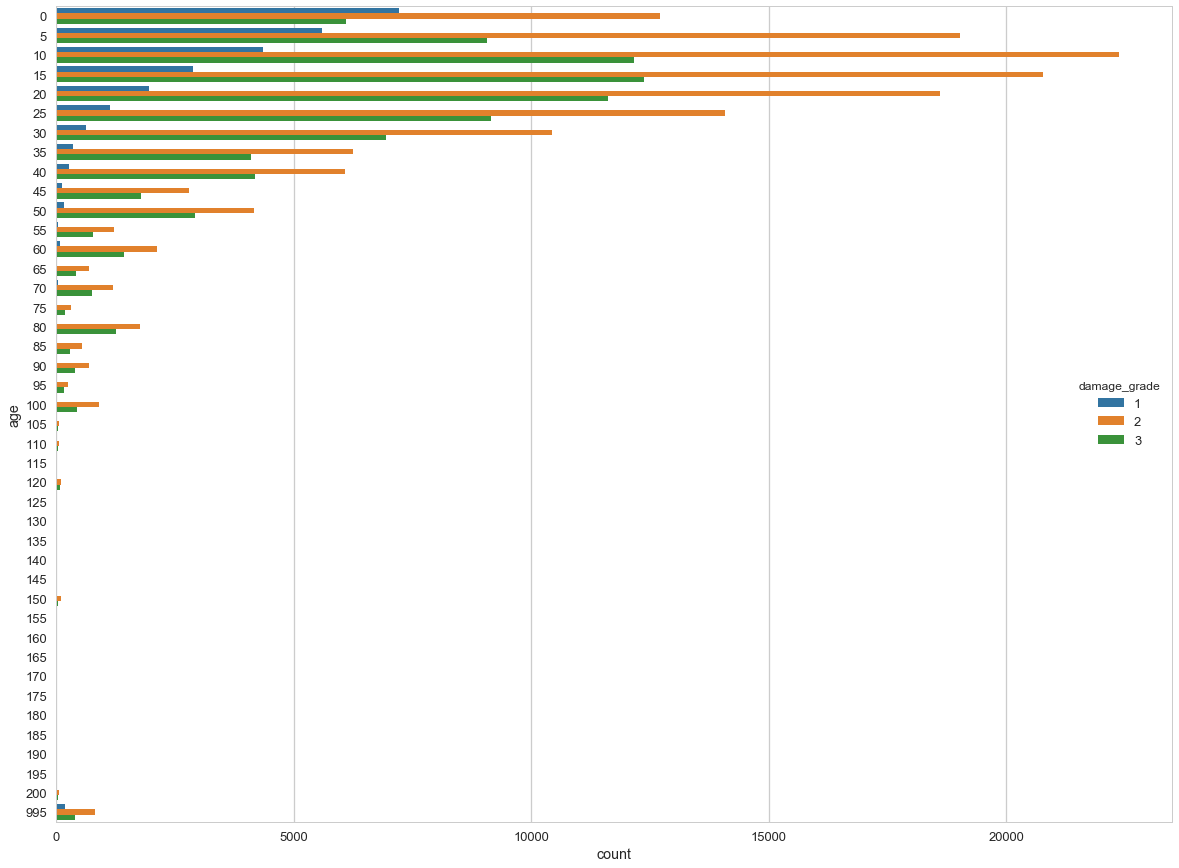

In [722]:
# Age
plt.figure(figsize=(20, 15))
sns.countplot(y='age', hue='damage_grade', data=df_raw)
plt.show()

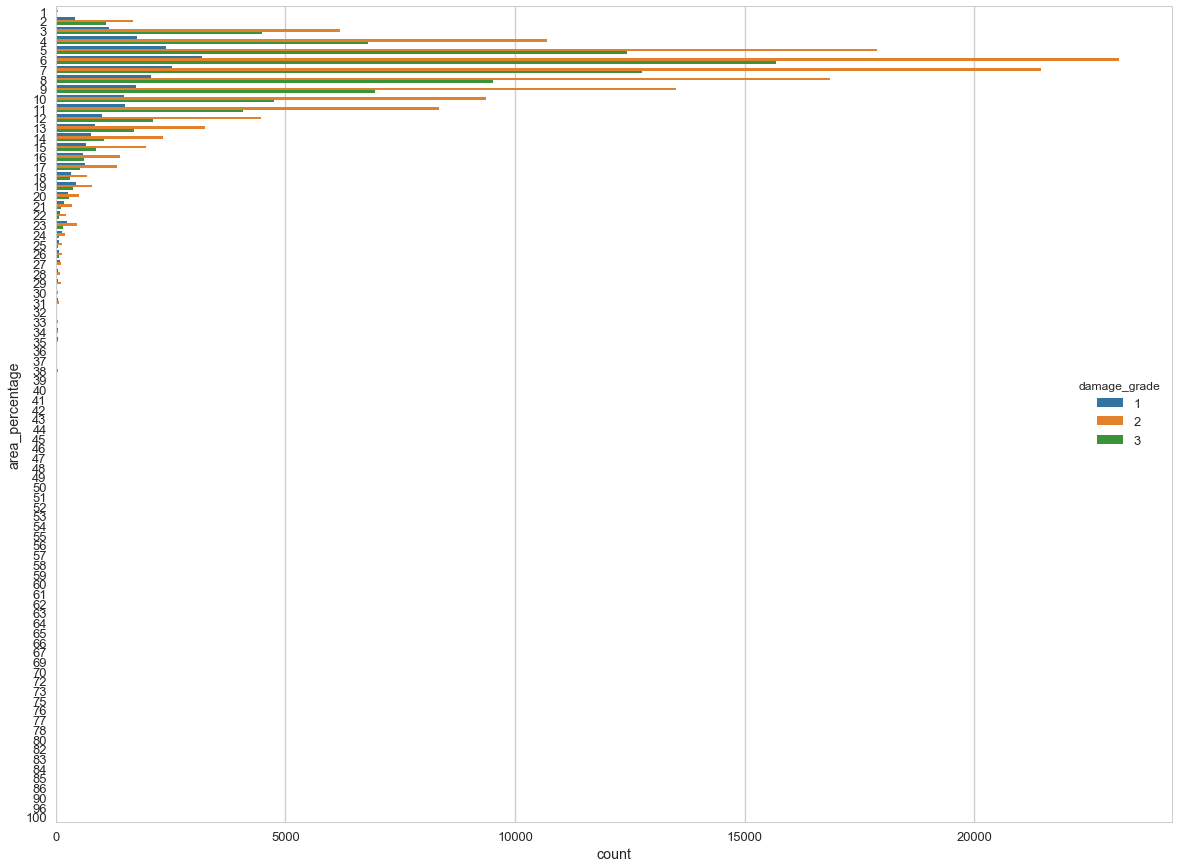

In [771]:
# Area percentage
plt.figure(figsize=(20, 15))
sns.countplot(y='area_percentage', hue='damage_grade', data=df_raw)
plt.show()

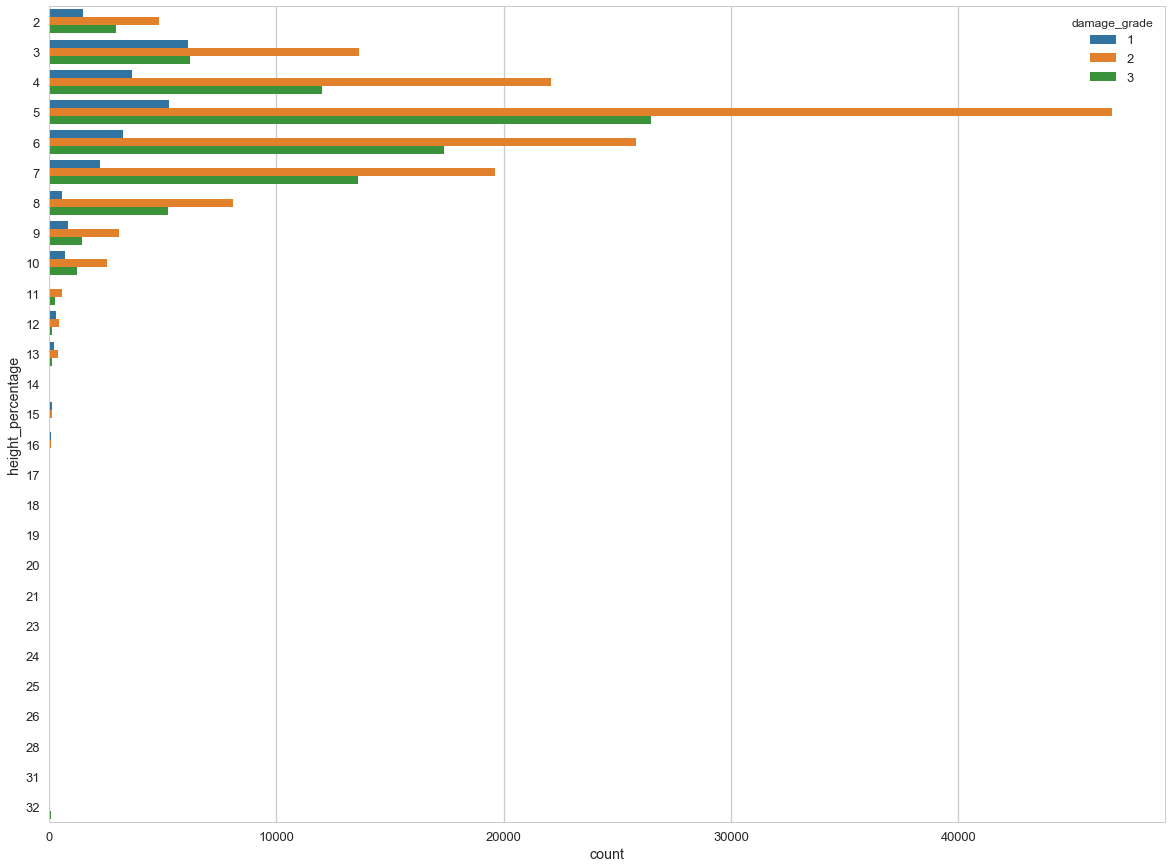

In [772]:
# Height percentage
plt.figure(figsize=(20, 15))
sns.countplot(y='height_percentage', hue='damage_grade', data=df_raw)
plt.show()

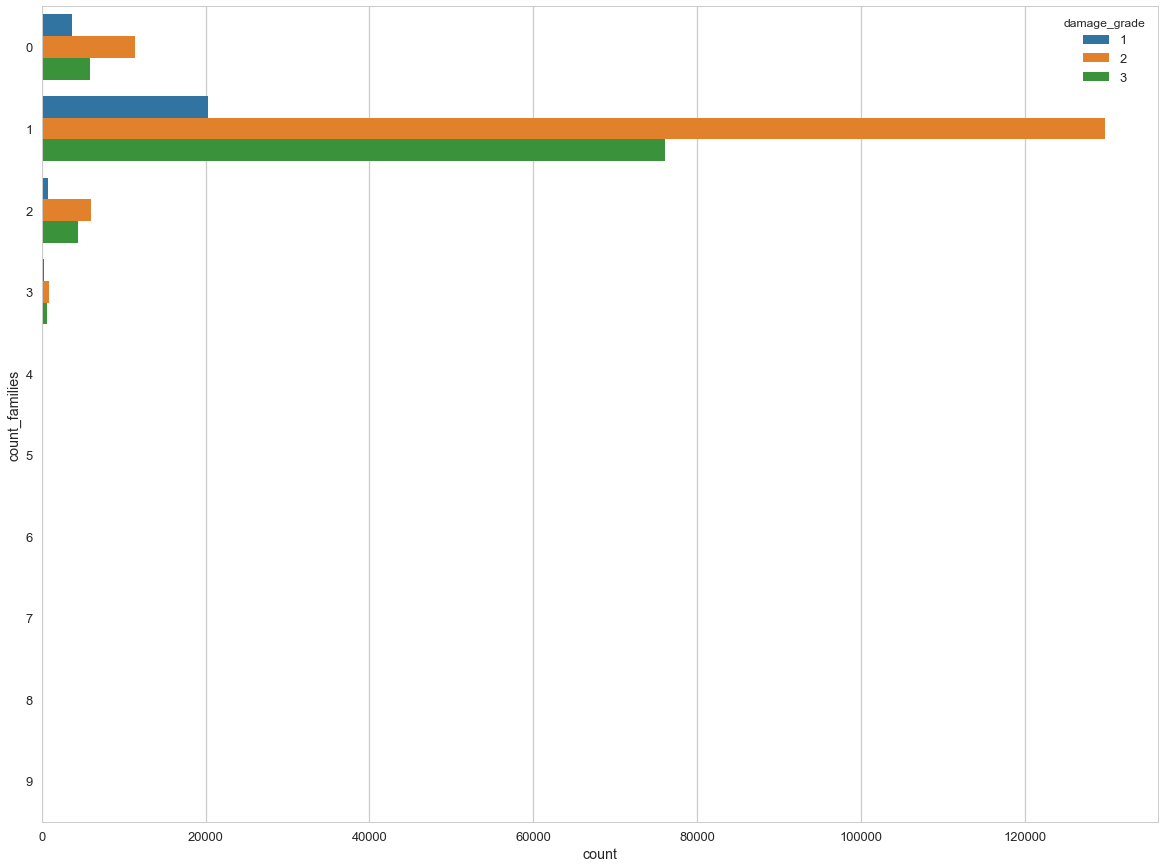

In [797]:
# Count families
plt.figure(figsize=(20, 15))
sns.countplot(y='count_families', hue='damage_grade', data=df_raw)
plt.show()

# Train-Validation Set Creation

In [ ]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_val, _, _ = train_test_split(
    df_raw.values,
    df_raw['damage_grade'].values,
    stratify=df_raw['damage_grade'].values,
    test_size=0.33,
    random_state=9
)

df_raw_train = pd.DataFrame(X_train, columns=df_raw.columns).infer_objects()
df_raw_val = pd.DataFrame(X_val, columns=df_raw.columns).infer_objects()

(174602, 40)
(85999, 40)
(86868, 39)


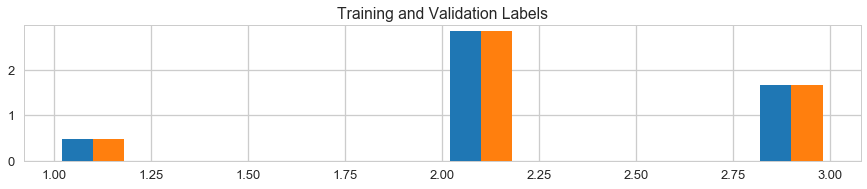

In [114]:
print(df_raw_train.shape)
print(df_raw_val.shape)
print(df_raw_test.shape)

plt.figure(figsize=(15, 2.5))
plt.hist([df_raw_train['damage_grade'].values, df_raw_val['damage_grade'].values], density=True)
plt.title("Training and Validation Labels")
plt.show()

# Feature Engineering

In [115]:
df_interim_train = df_raw_train
df_interim_val = df_raw_val
df_interim_test = df_raw_test

In [116]:
# Create ratio features
def create_interaction_features(df):
    return (df.assign(
        age_mul_area=df.age * df.area_percentage,
        age_div_area=df.age / df.area_percentage.replace(0, 0.1),
        age_mul_fam=df.age * df.count_families,
        age_div_fam=df.age / df.count_families.replace(0, 0.1),
        area_mul_fam=df.area_percentage * df.count_families,
        area_div_fam=df.area_percentage / df.count_families.replace(0, 0.1)
    ))

df_interim_train = create_interaction_features(df_interim_train)
df_interim_val = create_interaction_features(df_interim_val)
df_interim_test = create_interaction_features(df_interim_test)

In [117]:
# Categorical: one hot encoding
df_interim_train = pd.concat([df_interim_train, pd.get_dummies(df_interim_train[cat_feats])], axis=1)
df_interim_val = pd.concat([df_interim_val, pd.get_dummies(df_interim_val[cat_feats])], axis=1)
df_interim_test = pd.concat([df_interim_test, pd.get_dummies(df_interim_test[cat_feats])], axis=1)

In [118]:
# Define features to label encode
feats_to_label_encode = (
    list(cat_feats) + 
    geo_level_id_feats + 
    ['age', 'area_percentage', 'height_percentage', 'count_families'] +        
    ['age_mul_area', 'age_div_area', 'age_mul_fam', 'age_div_fam', 'area_mul_fam', 'area_div_fam']
)

In [119]:
# Categorical: mean label encoding
damage_grade_dummies = pd.get_dummies(df_interim_train['damage_grade'], prefix='damage_grade')
for feat in feats_to_label_encode:
    mappings = (
        pd.concat([df_interim_train[feat], damage_grade_dummies], axis=1)
        .groupby(feat).mean()
        .to_dict()
    )
    
    df_interim_train["{}_labelEnc_1".format(feat)] = df_interim_train[feat].map(mappings['damage_grade_1'])
    df_interim_train["{}_labelEnc_2".format(feat)] = df_interim_train[feat].map(mappings['damage_grade_2'])
    df_interim_train["{}_labelEnc_3".format(feat)] = df_interim_train[feat].map(mappings['damage_grade_3'])
    df_interim_val["{}_labelEnc_1".format(feat)] = df_interim_val[feat].map(mappings['damage_grade_1'])
    df_interim_val["{}_labelEnc_2".format(feat)] = df_interim_val[feat].map(mappings['damage_grade_2'])
    df_interim_val["{}_labelEnc_3".format(feat)] = df_interim_val[feat].map(mappings['damage_grade_3'])
    df_interim_test["{}_labelEnc_1".format(feat)] = df_interim_test[feat].map(mappings['damage_grade_1'])
    df_interim_test["{}_labelEnc_2".format(feat)] = df_interim_test[feat].map(mappings['damage_grade_2'])
    df_interim_test["{}_labelEnc_3".format(feat)] = df_interim_test[feat].map(mappings['damage_grade_3'])

In [120]:
# Categorical: standard deviation label encoding
damage_grade_dummies = pd.get_dummies(df_interim_train['damage_grade'], prefix='damage_grade')
for feat in feats_to_label_encode:
    mappings = (
        pd.concat([df_interim_train[feat], damage_grade_dummies], axis=1)
        .groupby(feat).std()
        .to_dict()
    )
    
    df_interim_train["{}_labelEncStd_1".format(feat)] = df_interim_train[feat].map(mappings['damage_grade_1'])
    df_interim_train["{}_labelEncStd_2".format(feat)] = df_interim_train[feat].map(mappings['damage_grade_2'])
    df_interim_train["{}_labelEncStd_3".format(feat)] = df_interim_train[feat].map(mappings['damage_grade_3'])
    df_interim_val["{}_labelEncStd_1".format(feat)] = df_interim_val[feat].map(mappings['damage_grade_1'])
    df_interim_val["{}_labelEncStd_2".format(feat)] = df_interim_val[feat].map(mappings['damage_grade_2'])
    df_interim_val["{}_labelEncStd_3".format(feat)] = df_interim_val[feat].map(mappings['damage_grade_3'])
    df_interim_test["{}_labelEncStd_1".format(feat)] = df_interim_test[feat].map(mappings['damage_grade_1'])
    df_interim_test["{}_labelEncStd_2".format(feat)] = df_interim_test[feat].map(mappings['damage_grade_2'])
    df_interim_test["{}_labelEncStd_3".format(feat)] = df_interim_test[feat].map(mappings['damage_grade_3'])

In [121]:
# Catigorical: drop original columns
df_interim_train = df_interim_train.drop(list(cat_feats) + geo_level_id_feats, axis=1)
df_interim_val = df_interim_val.drop(list(cat_feats) + geo_level_id_feats, axis=1)
df_interim_test = df_interim_test.drop(list(cat_feats) + geo_level_id_feats, axis=1)

In [122]:
n_feats = df_interim_train.drop(['damage_grade', 'building_id'], axis=1).shape[1]
n = df_interim_train.shape[0]

print("Num features: {}".format(n_feats))
print("Features to data ratio: {:.3}".format(n_feats / n))
display(df_interim_train.head())

Num features: 197
Features to data ratio: 0.00113


,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,age_div_area,age_div_fam,age_mul_area,age_mul_fam,area_div_fam,area_mul_fam,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,land_surface_condition_labelEnc_1,land_surface_condition_labelEnc_2,land_surface_condition_labelEnc_3,foundation_type_labelEnc_1,foundation_type_labelEnc_2,foundation_type_labelEnc_3,roof_type_labelEnc_1,roof_type_labelEnc_2,roof_type_labelEnc_3,ground_floor_type_labelEnc_1,ground_floor_type_labelEnc_2,ground_floor_type_labelEnc_3,other_floor_type_labelEnc_1,other_floor_type_labelEnc_2,other_floor_type_labelEnc_3,position_labelEnc_1,position_labelEnc_2,position_labelEnc_3,plan_configuration_labelEnc_1,plan_configuration_labelEnc_2,plan_configuration_labelEnc_3,legal_ownership_status_labelEnc_1,legal_ownership_status_labelEnc_2,legal_ownership_status_labelEnc_3,geo_level_1_id_labelEnc_1,geo_level_1_id_labelEnc_2,geo_level_1_id_labelEnc_3,geo_level_2_id_labelEnc_1,geo_level_2_id_labelEnc_2,geo_level_2_id_labelEnc_3,geo_level_3_id_labelEnc_1,geo_level_3_id_labelEnc_2,geo_level_3_id_labelEnc_3,age_labelEnc_1,age_labelEnc_2,age_labelEnc_3,area_percentage_labelEnc_1,area_percentage_labelEnc_2,area_percentage_labelEnc_3,height_percentage_labelEnc_1,height_percentage_labelEnc_2,height_percentage_labelEnc_3,count_families_labelEnc_1,count_families_labelEnc_2,count_families_labelEnc_3,age_mul_area_labelEnc_1,age_mul_area_labelEnc_2,age_mul_area_labelEnc_3,age_div_area_labelEnc_1,age_div_area_labelEnc_2,age_div_area_labelEnc_3,age_mul_fam_labelEnc_1,age_mul_fam_labelEnc_2,age_mul_fam_labelEnc_3,age_div_fam_labelEnc_1,age_div_fam_labelEnc_2,age_div_fam_labelEnc_3,area_mul_fam_labelEnc_1,area_mul_fam_labelEnc_2,area_mul_fam_labelEnc_3,area_div_fam_labelEnc_1,area_div_fam_labelEnc_2,area_div_fam_labelEnc_3,land_surface_condition_labelEncStd_1,land_surface_condition_labelEncStd_2,land_surface_condition_labelEncStd_3,foundation_type_labelEncStd_1,foundation_type_labelEncStd_2,foundation_type_labelEncStd_3,roof_type_labelEncStd_1,roof_type_labelEncStd_2,roof_type_labelEncStd_3,ground_floor_type_labelEncStd_1,ground_floor_type_labelEncStd_2,ground_floor_type_labelEncStd_3,other_floor_type_labelEncStd_1,other_floor_type_labelEncStd_2,other_floor_type_labelEncStd_3,position_labelEncStd_1,position_labelEncStd_2,position_labelEncStd_3,plan_configuration_labelEncStd_1,plan_configuration_labelEncStd_2,plan_configuration_labelEncStd_3,legal_ownership_status_labelEncStd_1,legal_ownership_status_labelEncStd_2,legal_ownership_status_labelEncStd_3,geo_level_1_id_labelEncStd_1,geo_level_1_id_labelEncStd_2,geo_level_1_id_labelEncStd_3

In [152]:
# Save interim data
df_interim_train.to_csv("{}train.csv".format(dir_data_interim), index=False)
df_interim_val.to_csv("{}val.csv".format(dir_data_interim), index=False)
df_interim_test.to_csv("{}test.csv".format(dir_data_interim), index=False)

# Modeling

In [85]:
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

## Initial Fit - XGB Classifier

In [155]:
%%time
X_train_init = df_interim_train.drop(['damage_grade', 'building_id'], axis=1).values
y_train_init = df_interim_train['damage_grade'].values

clf_xgb_init = xgb.XGBClassifier(
    objective='multiclass:softmax',
    random_state=3,
    n_estimators=50,
)

clf_xgb_init.fit(
    X_train_init,
    y_train_init,
    eval_set=[(X_train_init, y_train_init)],
    verbose=False
);

CPU times: user 1min 44s, sys: 997 ms, total: 1min 45s
Wall time: 1min 45s


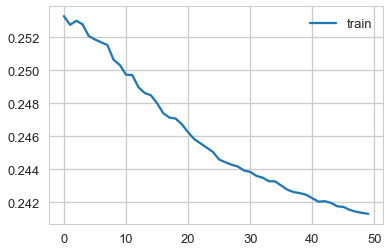

In [156]:
# Plot evaluation metrics by ntrees
plt.plot(clf_xgb_init.evals_result()['validation_0']['merror'], label='train')
plt.legend()
plt.show()

## Refit - XGB Classifier

In [157]:
# Get feature importances
df_feats = (
    pd.DataFrame(clf_xgb_init.feature_importances_, columns=['feature'])
    .set_index(df_interim_train.drop(['damage_grade', 'building_id'], axis=1).columns)
)

# Define good features
feats_to_keep = df_feats.reset_index()['index'].loc[(df_feats.feature != 0).values].values
print("Dropping {} features".format(np.sum(df_feats == 0)[0]))
print("Keeping  {} features".format(np.sum(df_feats != 0)[0]))

# Re-define datasets using only good features
X_train = df_interim_train.loc[:, feats_to_keep].values
X_val = df_interim_val.loc[:, feats_to_keep].values
X_test = df_interim_test.loc[:, feats_to_keep].values

y_train = df_interim_train['damage_grade'].values
y_val = df_interim_val['damage_grade'].values

Dropping 145 features
Keeping  52 features


In [171]:
%%time
def f1_eval_metric(preds, dtrain):
    y_true = dtrain.get_label()
    y_pred = np.argmax(preds, axis=1)
    return 'f1', -1 * f1_score(y_true, y_pred, average='micro')

# Re-fit model using only good features
clf_xgb = xgb.XGBClassifier(
    objective='multiclass:softmax',
    random_state=3,
    base_score=1,
    n_estimators=150,
    learning_rate=0.5,
    subsample=0.8,
    colsample_bytree=0.8,
    max_depth=3,
    gamma=0.1
)

clf_xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric=f1_eval_metric,
    early_stopping_rounds=10,
    verbose=False
);

CPU times: user 1min 14s, sys: 192 ms, total: 1min 14s
Wall time: 1min 14s


In [177]:
# Predict
pred_train = clf_xgb.predict(X_train)
pred_val = clf_xgb.predict(X_val)
pred_test = clf_xgb.predict(X_test)

# Evaluate
score_train = f1_score(y_train.astype(int), pred_train.astype(int), average='micro')
score_val = f1_score(y_val.astype(int), pred_val.astype(int), average='micro')
print("Train f1 score: {}".format(score_train))
print("Val f1 score:   {}".format(score_val))

Train f1 score: 0.7700083618744344
Val f1 score:   0.734031791067338


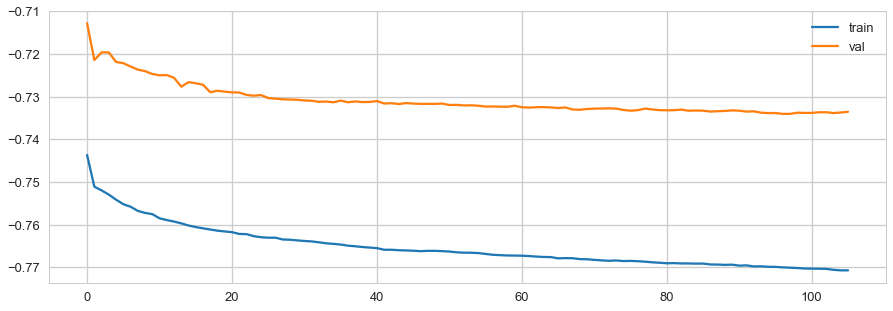

best ntree limit: 97


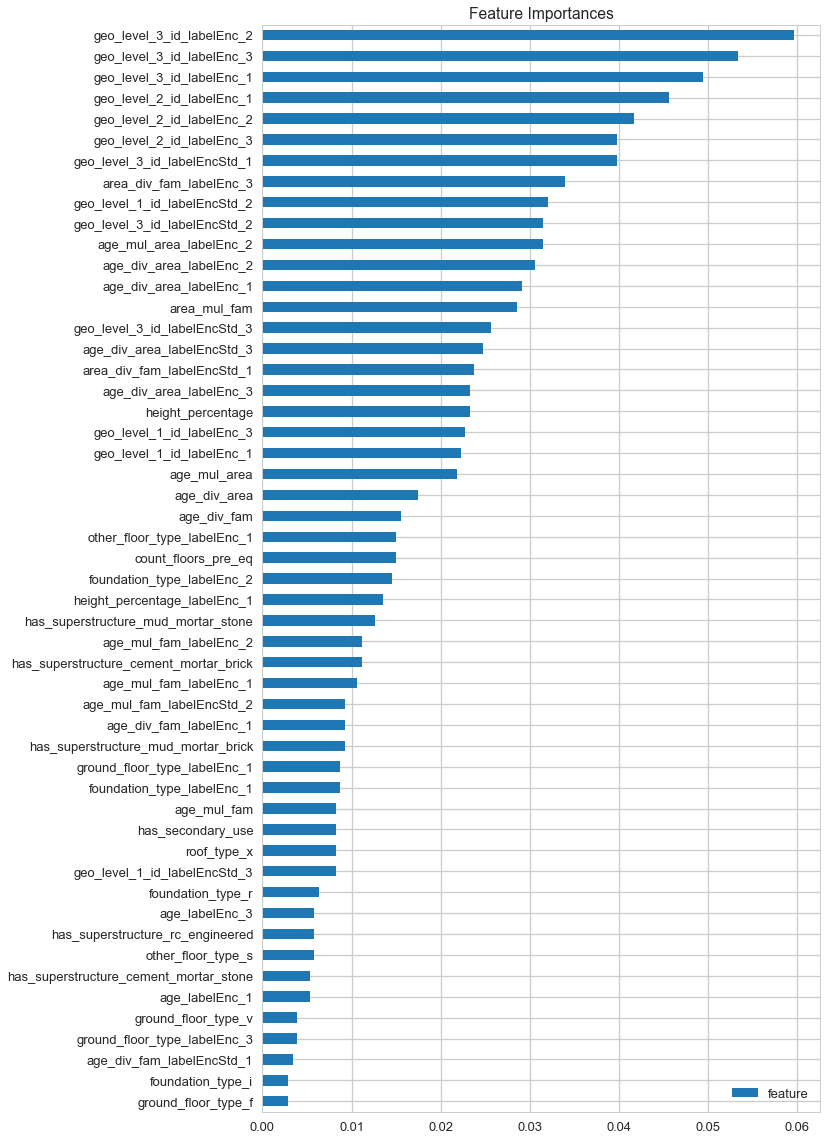

In [178]:
# Plot evaluation metrics by ntrees
plt.plot(clf_xgb.evals_result()['validation_0']['f1'], label='train')
plt.plot(clf_xgb.evals_result()['validation_1']['f1'], label='val')
plt.legend()
plt.show()
print("best ntree limit: {}".format(clf_xgb.best_ntree_limit))

# Plot feature importances
df_feats = (
    pd.DataFrame(clf_xgb.feature_importances_, columns=['feature'])
    .set_index(df_interim_train.loc[:, feats_to_keep].columns)
    .sort_values('feature')
)
df_feats.plot(kind='barh', figsize=(10, 20), title="Feature Importances")
plt.show()

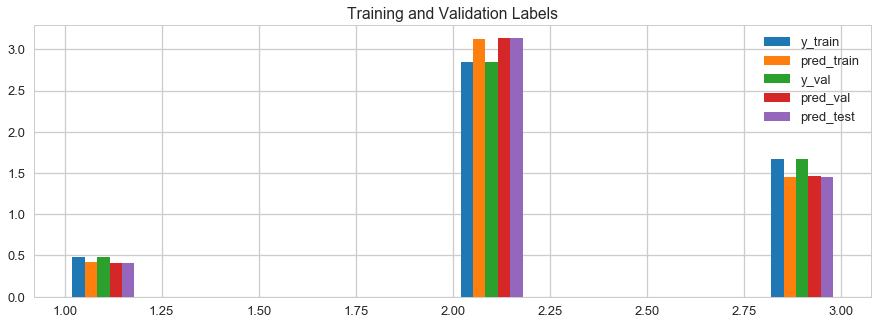

In [179]:
plt.figure(figsize=(15, 5))
plt.hist([y_train, pred_train, y_val, pred_val, pred_test], 
         density=True, 
         label=['y_train', 'pred_train', 'y_val', 'pred_val', 'pred_test'])
plt.title("Training and Validation Labels")
plt.legend()
plt.show()

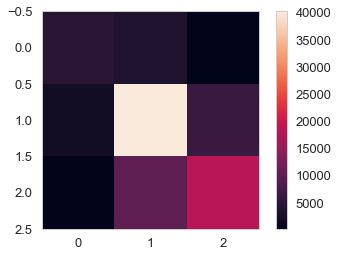

In [180]:
from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(y_val.astype(int), pred_val.astype(int)))
plt.colorbar()
plt.grid(False)
plt.show()

# Create Submission

In [184]:
%%time
Re-train on entire dataset
clf_xgb_final = clf_xgb
clf_xgb_final.n_estimators = clf_xgb.best_ntree_limit
clf_xgb_final.fit(
    np.concatenate((X_train, X_val)),
    np.concatenate((y_train, y_val)),
    verbose=False
)

# Make test set predictions
pred_test_final = clf_xgb_final.predict(X_test)

CPU times: user 728 ms, sys: 13.1 ms, total: 741 ms
Wall time: 739 ms


In [185]:
# Create submission file
import datetime
now = datetime.datetime.now()
(
    df_raw_test
    .assign(damage_grade=pred_test_final)
    .loc[:, ['building_id', 'damage_grade']]
    .to_csv("../models/{date}_submission_xgb.csv".format(date=now), index=False)
)

# Sandbox